---   
 <img align="left" width="75" height="75"  src="../../University_of_the_Punjab_logo.png"> 

<h1 align="center">Department of Data Science</h1>
<h1 align="center">Data Science Journey from Beginners to Expert</h1>

---
<h3><div align="right">Instructor: Engr. Muhammad Nadeem Majeed, Ph.D.</div></h3>    

<h1 align="center">file handling</h1>

## _file_handling.ipynb_

## Learning agenda of this notebook

1. What are Files, and Why we need them?
2. Opening a text file in Python
3. Reading contents of a file
4. Writing and appending data in a file
5. Closing a file
6. Change File Offset using `fd.seek()` method
7. Performing some Operations on File Contents
8. Reading Attributes of a File using `os.stat()` method
9. Identifying Type of File
10.Bonus: Handling Image Files in Python

## 1. What are Files, and Why we need them?
- An important component of an operating system is its files and directories. A file is a location on disk that stores related information and has a name. We use files to organize our data in different directories on a hard-disk.
- The RAM (Random Access Memory) is volatile; it holds data only as long as it is up. So, we use files to store data permanently.

### File Types
- Python supports two types of files (Binary files and Text files):
    - **Binary Files:** All binary files follow a specific format. We can open some binary files in the normal text editor, but we cannot read the content present in the file. This is because the binary files are encoded in a specific format. So for handling binary files we need applications that understand the specific format of that binary file. Most of the files that we see in our computer systems are binary files. Some examples are:
        - **Document Files:** .pdf, .doc, .xls, etc
        - **Image Files:** .png, .jpg, .gif, .bmp, etc
        - **Audio Files:** .mp3, .wav, .mka, .aac, etc
        - **Video Files:** .mp4, .3gp, .mkv, .avi, etc
        - **Database Files:** .mdb, .accde, .frm, .sqlite, etc
        - **Archive Files:** .zip, .gzip, .rar, .tar, .iso, .7z, etc
        - **Executable Files:** .exe, .dll, .elf, .class, etc
    - **Text Files:** Text files do not have any specific encoding and can be opened in a normal text editor. Text files are mostly structured as a sequence of lines, where each line includes a sequence of characters. Every line in a file terminates with a special character known as EOL or end of line. Some examples are:
        - **Document Files:** .txt, .tex, .rtf, etc
        - **Source Codes:** .c, .cpp, .js, .py, .java, etc
        - **Web Standards:** .html, .xml, .css, .json, etc
        - **Tabular Data:** .csv, .tsv, etc
        - **Configuration Files:** .ini, .cfg, .reg, etc

   
### File Handling in Python
For file handling there are four important operations that can be handled by Python on files:
 - open
 - read
 - write
 - close
 
There are other file operations as well e.g., deleting a file, renaming a file, appending data to file, copying a file, changing properties of file. However, CRUD operations are basic file handling operations.

## 2. Opening a File
Files in Python can be opened with a built-in `open()` function. Ideally, it takes two string arguments:
- The `filepath` including the file name and the extension we want to open (passed as a string)
- The `mode` in which we want to open the file (passed as a string), default value is `'rt'`
***
**`open(file,  mode='rt')`**
***

Where,
- `file` is the only required argument, including the file name and the extension we want to open (passed as a string)
- `mode` is for the file access modes (passed as a string)
- For other arguments read documentation  `help(open)`

**FILE ACCESS MODES**

 * `Read Only (‘r’)`: It opens the text file for reading. If the file does not exist, raises I/O error.
 * `Read and Write (‘r+’)`: It opens the file for reading and writing. Raises I/O error if the file does not exists.
 * `Write Only (‘w’)`: It opens the file for writing only. For existing file, data is truncated. Creates the file if the file does not exists.
 * `Write and Read (‘w+’)`: It opens the file for reading and writing. For existing file, data is truncated. Creates the file if the file does not exists.
 * `Append Only (‘a’)`: It opens the file for writing, appending to the end off the file if it exists. The file is created if it does not exist.
 * `Append and Read (‘a+’)`: It opens the file for reading and writing. The file is created if it does not exist. The data being written will be inserted at the end, after the existing data.
 * `Exclusive creation (‘x’)`: It Opens a file for exclusive creation. If the file already exists, the operation fails.
 
Along with above file access modes, you can also specify how file should be handled as text or binary
  * `Text file (‘t’)`: Opens a file in text mode
  * `Binary file (‘b’)`: Opens a file in binary mode


In [1]:
# Example 1: Open a text named file f1.txt, present in the current working directory in read write mode
# On Mac OS the absolute path may look like: /Users/arif/Documents/.../f1.txt
# In Microsoft OSs, the absolute path may look like: "C:\\Users\\Kakamanna\\f1.txt"

fd = open("f1.txt", "rt+")
fd

<_io.TextIOWrapper name='f1.txt' mode='rt+' encoding='cp1252'>

In [3]:
# Example 2: Open a binary file named image.png, present in the current working directory in read write mode

fd = open("image.png", "rb+")
fd

<_io.BufferedRandom name='image.png'>

## 3. Reading Contents of a File
- In Python once you have a file opened, there are three ways to read contents of that file:
```
fd.read(size=-1)
fd.readline(size=-1)
fd.readlines(sizehint=-1)
```

### a.  Using `fd.read(size=-1)` method
- The `fd.read()` method reads and returns `size` characters from the file (if size is positive)
- If `size` is negative or omitted, read until EOF

In [4]:
# Example: 
fd = open("f1.txt","r") 
fd = open("f1.txt")
fd = open("f1.txt", "rt")    # are all equivalent

rv = fd.read(5)
print(rv, type(rv))


Hello <class 'str'>


In [5]:
# Example: Reading the complete file till EOF character
fd=open("f1.txt")
fd.read()

'Hello Students.\nWelcome to File Handling with Arif Butt\nI learn a lot when I teach my students\nHope learning will be fun for you all, at least it is for me\nHappy Learning\n'

In [6]:
# Example: Try to read again, and notice what will happen?
fd.read()

''

>- As you can see we got an empty string. 
>- The reason is `fd.read()` always reads from the current file offset, which in this situation has reached the end of file, therefore it returns an empty string

In [7]:
# close the file
fd.close()

In [8]:
# Let us open and read the file again
fd = open("f1.txt","r")
print(fd.read())
fd.close()

Hello Students.
Welcome to File Handling with Arif Butt
I learn a lot when I teach my students
Hope learning will be fun for you all, at least it is for me
Happy Learning



### b. Using `fd.readline(size=-1)` method
- The `fd.readline()` method reads and returns one line at a time
- If `size` is passed then reads and returns size characters of a line

In [9]:
# Example: If you want to read a file line by line use readline() method
fd = open("f1.txt","r")
print(fd.readline())
print(fd.readline())
print(fd.readline())
print(fd.readline())
print(fd.readline())

# close the file
fd.close()

Hello Students.

Welcome to File Handling with Arif Butt

I learn a lot when I teach my students

Hope learning will be fun for you all, at least it is for me

Happy Learning



In [10]:
# Example: If you want to read a file line by line use readline() method
fd = open("f1.txt","r")
#print(fd.readline())
print(fd.readline(5))

# close the file
fd.close()

Hello


>So `fd.read()` method focuses on reading a file character by character, while the `fd.readline()` method focuses on reading a file line by line.

### c. Using `fd.readlines(sizehint=-1)` method
- The `fd.readlines()` method reads until end of file and returns a list object containing the lines. 

In [11]:
fd = open("f1.txt","r")
mylist = fd.readlines()
print(mylist)
print(type(mylist))

# close the file
fd.close()

['Hello Students.\n', 'Welcome to File Handling with Arif Butt\n', 'I learn a lot when I teach my students\n', 'Hope learning will be fun for you all, at least it is for me\n', 'Happy Learning\n']
<class 'list'>


- If the optional `sizehint` passed, instead of reading up to EOF, whole lines totalling approximately `sizehint` bytes are read. (possibly after rounding up to an internal buffer size) 

In [12]:
fd = open("f1.txt","r")
rd = fd.readlines(17)

print(rd)

# close the file
fd.close()

['Hello Students.\n', 'Welcome to File Handling with Arif Butt\n']


## 4. Writing in a File

### a. The `fd.write()` method
- To write a file, one must open the file in write or append mode.
- The `fd.write(text)` method is used to write a string to file.
- If the file is opened in write mode the existing file data is overwritten
- If the file is opened in append mode the new data is written at the end of the file
- If the file doesnot exist, a new file with that name is created
- The `fd.write(text)` returns the number of characters written (which is always equal to the length of the string) It overwrites the existing data. If the file doesn't exist, it will create the file. 


 * `Append Only (‘a’)`: It opens the file for writing, appending to the end off the file if it exists. The file is created if it does not exist.
 * `Append and Read (‘a+’)`: It opens the file for reading and writing. The file is created if it does not exist. The data being written will be inserted at the end, after the existing data.
 

**Example 1:** Let us create a new file in the present working directory. Let us use `mode='w'`(`Write Only`). It will create the file as it do not exist. If the file with the name exist its data is truncated.

In [13]:
fd1 = open('out.txt','w')
rv = fd1.write('Python is Awesome!')
print("Number of bytes written in the file: ", rv)
fd1.close()


# Let us open the file in read mode and read its contents
fd1 = open('out.txt')
print(fd1.read())
fd1.close()


Number of bytes written in the file:  18
Python is Awesome!


**Example 2:** Let us again open `out.txt` file in the present working directory in `mode=w+` (Write and Read). Since the file already exist, the file is opened and its data is truncated. If the file with the neame does not exist, a new file is created.

In [14]:
fd1 = open('out.txt','w+') # Due to w+ all the data is truncated

print("Existing data in the file is: ", fd1.read())

# Since the file is opened in read-write mode so we can write in the file
fd1.write('Learning Python is Fun!')

# Since the file is opened in read-write mode so we can read from the file
print("Data in out.txt after writing: ", fd1.read())

#This is because the file offset is at the end of the file
fd1.seek(0)
print("Data read again after seek: ", fd1.read())

fd1.close()

Existing data in the file is:  
Data in out.txt after writing:  
Data read again after seek:  Learning Python is Fun!


**Example 3:** Let us now append some text in the file `out.txt` by opening it in append mode `mode=a`. It opens the file for writing, appending to the end of the file if it exists. The file is created if it does not exist.

In [15]:
# creating a list
fruits = ["\nApple","\nBanana","\nOranges"]

# open a file in append mode
fd =open("out.txt",mode="a")

#Copying the list content in file
for fruit in fruits:
    fd.write(fruit)

fd.close()


# open a file in read mode again
fd =open("out.txt")

#reading the data from file
for line in fd:
    print(line)
    
# close the file
fd.close()

Learning Python is Fun!

Apple

Banana

Oranges


## 5. Closing a File

### a. The `fd.close()` method
Closing a file will free up the resources that were tied with the file. Python has a garbage collector to clean up unreferenced objects but we must not rely on it to close the file.

In [16]:
# open a file
f = open("f1.txt", "r")

# perform some file operations

#close the file
f.close()

### b. Use `fd.close()` in `try...finally` Block
- Often one forgets to close an open file. This may produce errors and may become harmful when you are working on large files.
- Moreover, if an exception occurs when we are performing some operation with the file, the program exits without closing the file.

> In such scenarios, `try-except-finally` blocks come to the rescue. We can keep the  `fd.close()` method in the finally block, so that even if the program execution stops due to an exception, the file will get closed anyway.

In [17]:
# Put the entire code in try block
try:
    fd = open("f1.txt", "r")
   # perform file operations
    
finally:
    fd.close()

### c. Use of `with` Keyword while opening a File
- The best way to open a file in Python script is by using the `with` keyword. 
- This guarantees that the file will automatically be closed when the block inside the `with` statement exits.
- Even if an exception occurs before the end of the block, it will close the file before the exception is caught by an outer exception handler.

In [20]:
# open the file in read mode using with statement
with open("f1.txt", "r") as fd:
    
    # perform file operations
    print(fd.read())
   

Hello Students.
Welcome to File Handling with Arif Butt
I learn a lot when I teach my students
Hope learning will be fun for you all, at least it is for me
Happy Learning



**Let us confirm if the file opened in the above code cell is closed or not**

In [21]:
fd.read()

ValueError: I/O operation on closed file.

## 6. Change File Offset using `fd.seek()` method
<img align="right" width="500" height="300"  src="images/seek.png"  > 

The `fd.seek()` method is used to change the position of the File Handle or current file offset to a given specific position, from where the data has to be read or written in the file. The method returns the new absolute position.
```
seek(offset, whence)
```
Where,
 - `offset` means the number of positions to move forward/backward. It is interpreted relative to the position indicated by whence
 - `whence` can take following values: 
     - 0:  start of stream (the default); offset should be zero or positive 
     - 1:  current stream position; offset may be negative
     - 2:  end of stream; offset is usually negative
     
**Note:** 
- Reference point at current position / end of file cannot be set in text mode except when offset is equal to 0.
- Seek() function with negative offset only works when file is opened in Binary mode.

In [22]:
# Example:
fd = open("f1.txt","r")

# check the position of file offset
rv = fd.seek(0, 1)                 # fd.seek(0, 1) is equivalent to  fd.tell()
print("Cursor is pointing at the location: ", rv)


# Let us read five characters and check the position of file offset
fd.read(5)
rv = fd.seek(0, 1)
print("Cursor is pointing at the location: ", rv)


# Let us read remaining portion of file and check the position of file offset
fd.read()
rv = fd.seek(0, 1)
print("Cursor is pointing at the location: ", rv)


fd.close()

# fd.seek(0, 1) is equivalent to  fd.tell()

Cursor is pointing at the location:  0
Cursor is pointing at the location:  5
Cursor is pointing at the location:  171


In [23]:
# Example: Let us do some more practice with the seek() function
# open a file in append mode
fd = open("f1.txt","a")
print("Cursor is pointing at the location: ", fd.seek(0, 1))

# set the cursor to beginning
cur = fd.seek(0, 0)   # equivalent to fd.seek(0, 0)
print("Cursor is pointing at the location: ", cur)

# set the cursor to 100 position from beginning
cur = fd.seek(100)   # equivalent to fd.seek(100, 0)
print("Cursor is pointing at the location: ", cur)


# let us move the cursor 50 bytes back from current position
cur = fd.seek(50, 0)   
print("Cursor is pointing at the location: ", cur)

#close the file
fd.close()

Cursor is pointing at the location:  171
Cursor is pointing at the location:  0
Cursor is pointing at the location:  100
Cursor is pointing at the location:  50


## 7. Performing some Operations on File Contents

### a. Iterating Contents of a File (Line by Line)

**Using a `while` loop**

In [24]:
fd = open("hello.txt","r")

while True:
    line = fd.readline()
    if not line:
        break
    print(line)

    
fd.close()

Hello Students.... I wish you all a very Happy Learning.



**Using a `for` loop**

In [25]:
fd = open("hello.txt","r")

for line in fd:  #File handle can be used as iterator in the for loop
    print(line)

    
fd.close()

Hello Students.... I wish you all a very Happy Learning.



**A better way to iterate a file line by line using a `for` loop**

In [26]:
for line in open("hello.txt", 'r'):
    print(line)

#How can we close the file handle, as we dont have one

Hello Students.... I wish you all a very Happy Learning.



**The best way to iterate a file line by line using a `for` loop**

In [27]:
with open("hello.txt", 'r') as fd:
    for line in fd:
        print(line)

Hello Students.... I wish you all a very Happy Learning.



### b.  Count the words in the file using `str.split()` method

In [28]:
# Example:

totalwords = 0
with open("f1.txt", "r") as fd:
    for line in fd:
        listoftokens = line.split(' ')
        print(line, len(listoftokens))
        totalwords = totalwords + len(listoftokens)

print("\nTotal words in this file are: ", totalwords)

Hello Students.
 2
Welcome to File Handling with Arif Butt
 7
I learn a lot when I teach my students
 9
Hope learning will be fun for you all, at least it is for me
 14
Happy Learning
 2

Total words in this file are:  34


## 8. Reading Attributes of a File using `os.stat()` method
- The `os.stat(path)` method is used to get attributes of a file like
    - size of file
    - file type
    - owner of file
    - file time stamps, ....

In [29]:
import os

status = os.stat("out.txt")

status


os.stat_result(st_mode=33206, st_ino=2814749767383032, st_dev=676289378, st_nlink=1, st_uid=0, st_gid=0, st_size=47, st_atime=1702370182, st_mtime=1702370182, st_ctime=1702369672)

In [1]:
# You can extract the information individually
import os

status = os.stat("out.txt")

print("File size: ", status.st_size)

# extract the file type and file mode bits (permissions)
print("File type and permissions: ", status.st_mode)

# user identifier of the file owner
print("File Owner: ", status.st_uid)

# recent access time in seconds
print("Last access time: ", status.st_atime)

# recent modification time in seconds
print("Last modification time: ", status.st_mtime)

# recent metadata change on Unix and creation time on Windows
print("Last status change time: ", status.st_ctime)

File size:  47
File type and permissions:  33206
File Owner:  0
Last access time:  1702371970.9858131
Last modification time:  1702370182.3102512
Last status change time:  1702369672.5310516


## 9. Identifying Type of File

In [ ]:
import os
!ls

name = input("Enter name of the file/directory: ")

if os.path.isfile(name):
    print("It is a file")
elif os.path.isdir(name):
    print("It is a directory")

else:
    print("Unknown file type or file do not exist")

In [36]:
%system dir

import subprocess
subprocess.run(['dir'], shell=True, check=True)


CompletedProcess(args=['dir'], returncode=0)

In [3]:
import os
%system dir

[' Volume in drive C has no label.',
 ' Volume Serial Number is 284F-5B62',
 '',
 ' Directory of C:\\Users\\Dr. Nadeem Majeed\\Desktop\\Tools & Techniques Notebooks\\DataScienceJourney\\Section-2-Basics-of-Python-Programming\\2.16-File-Handling-in-Python',
 '',
 '12-Dec-23  03:21 PM    <DIR>          .',
 '12-Dec-23  03:21 PM    <DIR>          ..',
 '12-Dec-23  01:27 PM    <DIR>          .ipynb_checkpoints',
 '16-Jun-23  11:28 AM           191,065 arif.png',
 '16-Jun-23  11:28 AM                 5 array.bin',
 '12-Dec-23  01:58 PM                 0 backup.bin',
 '16-Jun-23  11:28 AM                 5 binary.txt',
 '12-Dec-23  01:54 PM            10,108 corpped_speech.jpg',
 '16-Jun-23  11:28 AM            10,098 cropped_speech.jpg',
 '16-Jun-23  11:28 AM               171 f1.txt',
 '16-Jun-23  11:28 AM               242 f2.txt',
 '12-Dec-23  01:55 PM               103 family.csv',
 '16-Jun-23  11:28 AM               384 file1.csv',
 '12-Dec-23  03:21 PM         2,397,933 file_handling.

In [5]:
import os
%system dir

name = input("Enter name of the file/directory: ")

if os.path.isfile(name):
    print("It is a file")
elif os.path.isdir(name):
    print("It is a directory")

else:
    print("Unknown file type or file do not exist")

Enter name of the file/directory: temp
Unknown file type or file do not exist


# Bonus: Reading CSV Files in Python

In [39]:
import csv
with open('file1.csv', 'r') as fd:
    obj = csv.reader(fd)
obj

In [40]:
import csv
with open('file1.csv', 'r') as fd:
    obj = csv.reader(fd)
    for line in obj:
        print(line)

['', 'rollno', 'gender', 'group', 'age', 'math', 'english', 'urdu']
['0', 'MS01', 'female', 'group B', '28', '72', '72', '74']
['1', 'MS02', 'female', 'group C', '33', '69', '90', '88']
['2', 'MS03', 'female', 'group B', '21', '90', '95', '93']
['3', 'MS04', 'male', 'group A', '44', '47', '57', '44']
['4', 'MS05', 'male', 'group C', '54', '76', '78', '75']
['5', 'MS06', 'female', 'group B', '29', '71', '83', '78']
['6', 'MS07', 'female', 'group B', '47', '88', '95', '92']
['7', 'MS08', 'male', 'group B', '33', '40', '43', '39']
['8', 'MS09', 'male', 'group D', '27', '64', '64', '67']
['9', 'MS10', 'female', 'group B', '33', '38', '60', '50']


In [41]:
import csv
with open('file1.csv', 'r') as fd:
    obj = csv.reader(fd)    
    line = next(obj)    
    print(line)
    line = next(obj)
    print(line)

['', 'rollno', 'gender', 'group', 'age', 'math', 'english', 'urdu']
['0', 'MS01', 'female', 'group B', '28', '72', '72', '74']



# Bonus: Handling Image Files in Python
- Let us now try to open and read binary files in Python

In [1]:
fd = open("image.png", "rb")

In [2]:
print(fd.read())

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x1e\x00\x00\x02\x1e\x08\x02\x00\x00\x01\x0c\xa6\xa1\x8b\x00\x00\x00\x19tEXtSoftware\x00Adobe ImageReadyq\xc9e<\x00\x00\x03"iTXtXML:com.adobe.xmp\x00\x00\x00\x00\x00<?xpacket begin="\xef\xbb\xbf" id="W5M0MpCehiHzreSzNTczkc9d"?> <x:xmpmeta xmlns:x="adobe:ns:meta/" x:xmptk="Adobe XMP Core 5.3-c011 66.145661, 2012/02/06-14:56:27        "> <rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"> <rdf:Description rdf:about="" xmlns:xmp="http://ns.adobe.com/xap/1.0/" xmlns:xmpMM="http://ns.adobe.com/xap/1.0/mm/" xmlns:stRef="http://ns.adobe.com/xap/1.0/sType/ResourceRef#" xmp:CreatorTool="Adobe Photoshop CS6 (Windows)" xmpMM:InstanceID="xmp.iid:CC8C1453C90311E6997E86E5265323A5" xmpMM:DocumentID="xmp.did:CC8C1454C90311E6997E86E5265323A5"> <xmpMM:DerivedFrom stRef:instanceID="xmp.iid:CC8C1451C90311E6997E86E5265323A5" stRef:documentID="xmp.did:CC8C1452C90311E6997E86E5265323A5"/> </rdf:Description> </rdf:RDF> </x:xmpmeta> <?xpacket end="r

In [3]:
fd.close()

In [4]:
from PIL import Image

In [5]:
img = Image.open("speech.jpg")

In [6]:
img.format

'JPEG'

In [7]:
img.size

(720, 479)

In [8]:
img.mode

'RGB'

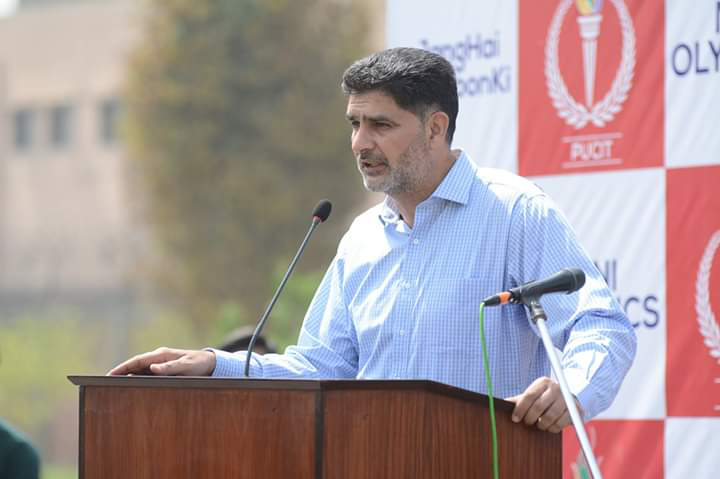

In [9]:
img

In [10]:
import numpy as np

In [11]:
img_array = np.array(img)

In [12]:
img_array.shape

(479, 720, 3)

In [13]:
img_array

array([[[252, 254, 253],
        [253, 255, 254],
        [253, 255, 254],
        ...,
        [191, 200, 233],
        [180, 188, 224],
        [190, 198, 235]],

       [[252, 254, 253],
        [252, 254, 253],
        [252, 254, 253],
        ...,
        [173, 182, 215],
        [155, 163, 199],
        [159, 167, 204]],

       [[251, 253, 252],
        [251, 253, 252],
        [251, 253, 252],
        ...,
        [150, 159, 192],
        [122, 130, 166],
        [120, 128, 165]],

       ...,

       [[ 24,  37,  43],
        [ 24,  37,  43],
        [ 24,  37,  43],
        ...,
        [209, 217, 236],
        [209, 217, 236],
        [209, 217, 236]],

       [[ 24,  37,  43],
        [ 24,  37,  43],
        [ 24,  37,  43],
        ...,
        [209, 217, 236],
        [209, 217, 236],
        [209, 217, 236]],

       [[ 23,  36,  42],
        [ 23,  36,  42],
        [ 23,  36,  42],
        ...,
        [209, 217, 236],
        [209, 217, 236],
        [209, 217, 236]]

In [14]:
img_copy = img.copy()

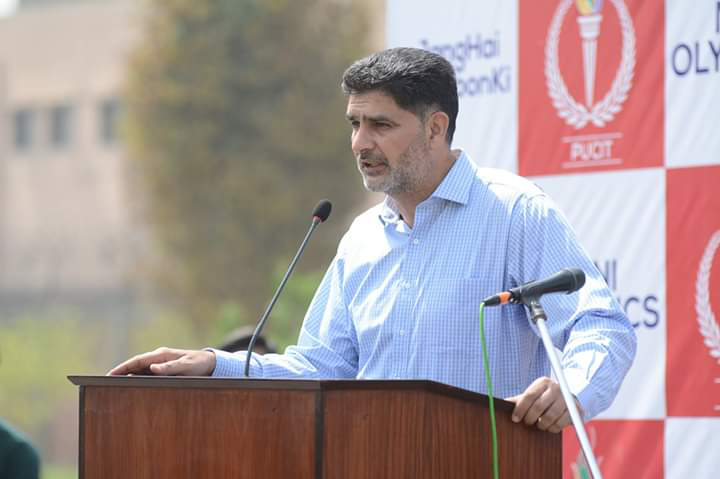

In [15]:
img_copy

In [16]:
img_cropped = img.crop((250,0,500,300))

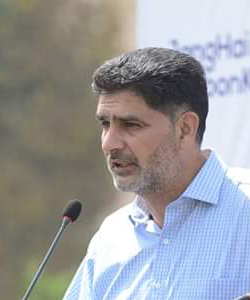

In [17]:
img_cropped

In [18]:
img_cropped.save('smallimg.jpg')

In [19]:
out = img_cropped.transpose(Image.ROTATE_90)

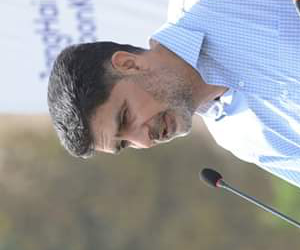

In [20]:
out

In [21]:
out.save('corpped_speech.jpg')

In [22]:
img2 = Image.open("corpped_speech.jpg")

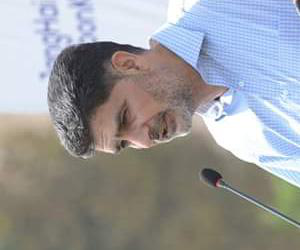

In [23]:
img2

In [24]:
https://www.youtube.com/watch?v=K1xO8weArNA&t=5m56s

SyntaxError: invalid decimal literal (2492816642.py, line 1)

# Bonus: Accessing Files from GitHub Gists

> While accessing Internet, if you get `SSL: CERTIFICATE_VERIFY_FAILED` error, set, the `_create_default_https_context` attribute of `ssl` to `_create_unverified_context`

In [25]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

> Get the raw data url of the file ('hellogist.txt') to be downloaded from your github gist. Pass that url to `urlretrieve()` function to download file to disk
```
urllib.request.urlretrieve(url, filename=None)
``` 

**Example1: Download, Open and Read `hellogist.txt` from course Gist**

In [26]:
import urllib

myurl = 'https://gist.githubusercontent.com/arifpucit/6e2d95002460db296506ec6f0cfb7008/raw/9dcad33321c01194dffe3586fc80c5a966a9494f/hellogist.txt'


urllib.request.urlretrieve(myurl, 'hellogist.txt')


('hellogist.txt', <http.client.HTTPMessage at 0x1f30f450490>)

Let us now open and read the file

In [27]:
fd = open("hellogist.txt","r")
mylist = fd.readlines()
print(mylist)
fd.close()

['This is a message to all my students, studying the course titled "Tools and Techniques for Data Science". This is a github gist for the course, and will contain some of the related files for practice purpose. \n', 'The file is named as hellogist.txt. All students should practice creating their own public and private gists, upload some files and try cloning and pushing as you have done with normal git repositories.\n', 'Happy Learning']


In [28]:
with open("hellogist.txt", 'r') as fd:
    for line in fd:
        print(line)

This is a message to all my students, studying the course titled "Tools and Techniques for Data Science". This is a github gist for the course, and will contain some of the related files for practice purpose. 

The file is named as hellogist.txt. All students should practice creating their own public and private gists, upload some files and try cloning and pushing as you have done with normal git repositories.

Happy Learning


**Example2: Download, Open and Read `family.csv` from course Gist**

In [29]:
import urllib

myurl = 'https://gist.githubusercontent.com/arifpucit/6e2d95002460db296506ec6f0cfb7008/raw/9dcad33321c01194dffe3586fc80c5a966a9494f/family.csv'


urllib.request.urlretrieve(myurl, 'family.csv')


('family.csv', <http.client.HTTPMessage at 0x1f30f450040>)

In [30]:
fd = open("family.csv","r")
mylist = fd.readlines()
print(mylist)
fd.close()

['Names,Age,Addr\n', 'Arif,50,Lahore\n', 'Rauf,52,Islamabad\n', 'Maaz,27,Peshawer\n', 'Hadeed,22,Islamabad\n', 'Mujahid,18,Karachi']


**Example3: Download, Open and Read `myself.txt` from course Gist**

In [31]:
import urllib

myurl = 'https://gist.githubusercontent.com/arifpucit/6e2d95002460db296506ec6f0cfb7008/raw/efee0050a52048215c8772063ba4ef47ecd2b514/myself.txt'


urllib.request.urlretrieve(myurl, 'myself.txt')


('myself.txt', <http.client.HTTPMessage at 0x1f30f450610>)

In [32]:
fd = open("myself.txt","r")
mylist = fd.readlines()
print(mylist)
fd.close()

['Dr. Muhammad Arif Butt is an Assistant Professor at the Department of Data Science, University of the Punjab (PU), Lahore, Pakistan. He received his MSc and MPhil degrees both with a Gold Medal from PUCIT, University of the Punjab. Dr. Butt also earned his Ph.D. in Computer Science from the same University. His research focuses on applying fuzzy inference models in operating, embedded, and cloud-based systems/services, where decision making is involved under imprecise and vague parameters. His teaching interests are advanced computer architecture, embedded/real time operating systems, system programming, and system modeling. His management and teaching experience spans over 33 years in various set ups of Pakistan Army and at University of the Punjab, Lahore, Pakistan. He is a detail-oriented, multi-tasker with strong organizational skills, is a tactful team player, thrive within group environment and enjoys a pleasant personality.\n', '\n', '\n', 'Dr. Muhammad Arif Butt\n', 'Assistan

In [33]:
with open("myself.txt", 'r') as fd:
    for line in fd:
        print(line)

Dr. Muhammad Arif Butt is an Assistant Professor at the Department of Data Science, University of the Punjab (PU), Lahore, Pakistan. He received his MSc and MPhil degrees both with a Gold Medal from PUCIT, University of the Punjab. Dr. Butt also earned his Ph.D. in Computer Science from the same University. His research focuses on applying fuzzy inference models in operating, embedded, and cloud-based systems/services, where decision making is involved under imprecise and vague parameters. His teaching interests are advanced computer architecture, embedded/real time operating systems, system programming, and system modeling. His management and teaching experience spans over 33 years in various set ups of Pakistan Army and at University of the Punjab, Lahore, Pakistan. He is a detail-oriented, multi-tasker with strong organizational skills, is a tactful team player, thrive within group environment and enjoys a pleasant personality.





Dr. Muhammad Arif Butt

Assistant Professor,

Depa

In [34]:
def display(fname):
    fd = open(fname, "r")
    for line in fd:
        print(line, end = '') 
    fd.close()
display('longfile.txt')

This is Line 1
This is Line 2
This is Line 3
This is Line 4
This is Line 5
This is Line 6
This is Line 7
This is Line 8
This is Line 9
This is Line 10
This is Line 11
This is Line 12
This is Line 13
This is Line 14
Bye Bye

### Write a Python program to display lines of a file in reverse order

In [35]:
def display(fname):
    fd = open(fname, "r")
    mylist = fd.readlines()
    for line in reversed(mylist):
        print(line.rstrip())
    fd.close()
display('longfile.txt')

Bye Bye
This is Line 14
This is Line 13
This is Line 12
This is Line 11
This is Line 10
This is Line 9
This is Line 8
This is Line 7
This is Line 6
This is Line 5
This is Line 4
This is Line 3
This is Line 2
This is Line 1


In [36]:
def display(fname, count):
    fd = open(fname, "r")
    a = 0
    mylist = fd.readlines()
    fd.close()
    for line in reversed(mylist):
        print(line.rstrip())# print(line, end = '')
        a = a + 1
        if a == count:
            break
display('longfile.txt', 5)

Bye Bye
This is Line 14
This is Line 13
This is Line 12
This is Line 11


### Write a Python program to count the number of lines  in a file.

In [37]:
def line_count(fname):
    fd = open(fname, "r")
    mylist = fd.readlines()
    fd.close()
    return len(mylist) 

line_count('longfile.txt')

15

### Write a Python program to count the number of words  in a file.

In [38]:
def word_count(fname):
    fd = open(fname, "r")
    mystring = fd.read()
    fd.close()
    mystring = mystring.replace('\n', ' ')
    wordcount = len(mystring.split(' '))
    return wordcount
    
word_count('f1.txt')

35

### Write a Python program to read a file and store its lines in  a list (w/o n ew line char at the end)

In [39]:
def read_lines(fname):
    mylist[]
    fd = open(fname)
    data = f.readlines()
    for myline in data:
        myline = myline.replace('\n', ' ')
        mylist.add(myline)
    print(mylist)

file_read('longfile.txt')


SyntaxError: invalid syntax (2438834243.py, line 2)

In [40]:
!cat f1.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
%system type f1.txt

['Hello Students.',
 'Welcome to File Handling with Arif Butt',
 'I learn a lot when I teach my students',
 'Hope learning will be fun for you all, at least it is for me',
 'Happy Learning']

### Write a python program to find the longest words.

In [44]:
def size_n_words(fname, n):
    fd = open(fname, 'r')
    mystring = fd.read()
    fd.close()
    mystring = mystring.replace('\n', ' ') #remove new line char if part of word
    mystring = mystring.replace('.', '') #remove period char if part of word
    mystring = mystring.replace(',', '') #remove comma char if part of word
    mylist = mystring.split(' ') # now you have list of words
    result_list = [word for word in mylist if len(word) == n]
    return result_list

size_n_words('f1.txt', 2)

['to', 'my', 'be', 'at', 'it', 'is', 'me']

In [45]:
lengths

NameError: name 'lengths' is not defined

In [46]:
def uld_count(fname):
    fd = open(fname,"r")
    data=fd.read()
    fd.close()
    lcase = 100
    ucase = lcase = digits = 0
    #lcase=0
    #digits=0
    for ch in data:
        if ch.islower():
            lcase+=1
        if ch.isupper():
            ucase+=1
        if ch.isdigit():
            digits+=1
    return ucase, lcase, digits
#print("Total Number of Upper Case letters are:",cnt_ucase)
#    print("Total Number of Lower Case letters are:",cnt_lcase)
#    print("Total Number of  digits are:",cnt_digits)
u, l, d = uld_count('longfile.txt')
print("Upper Case:", u)
print("Lower Case:", l)
print("Digits count:", d)

Upper Case: 30
Lower Case: 116
Digits count: 19


In [47]:
fd = open('longfile.txt', "r")
for line in fd:
    print(line)

This is Line 1

This is Line 2

This is Line 3

This is Line 4

This is Line 5

This is Line 6

This is Line 7

This is Line 8

This is Line 9

This is Line 10

This is Line 11

This is Line 12

This is Line 13

This is Line 14

Bye Bye


In [48]:
!cat f1.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
def search_word(fname):
    ctr = 0
    word_search = input("Enter the words to search:")
    fd = open(fname, "r")
    for line in fd:
        words = line.split()
        for word in words:
            if (word == word_search):
                ctr += 1
    fd.close()
    return ctr
rv = search_word('f1.txt')
print("Word found ", rv, " times in the file")

Enter the words to search:a
Word found  1  times in the file


In [50]:
def mycopy(src, dest):
    with open(src, "r") as fd1:
        data = fd1.read()
    with open(dest, "w") as fd2:
        fd2.write(data)
mycopy('longfile.txt', 'temp.txt')
!cat temp.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
def mycopy(src, dest):
    with open(src, "r") as fd1:
        data = fd1.read()
    with open(dest, "w") as fd2:
        fd2.write(data)
mycopy('longfile.txt', 'temp.txt')
%system type temp.txt

['This is Line 1',
 'This is Line 2',
 'This is Line 3',
 'This is Line 4',
 'This is Line 5',
 'This is Line 6',
 'This is Line 7',
 'This is Line 8',
 'This is Line 9',
 'This is Line 10',
 'This is Line 11',
 'This is Line 12',
 'This is Line 13',
 'This is Line 14',
 'Bye Bye']

In [51]:
def mymerge(file1, file2):
    with open(file1, "r") as fd1:
        data1 = fd1.read()     
        
    with open(file2, "r") as fd2:
        data2 = fd2.read()

    with open('merge.txt', "w") as fd3:
        fd3.write(data1)
        fd3.write(data2)
mymerge('hello.txt', 'f1.txt')
!cat merge.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [56]:
def mymerge(file1, file2):
    with open(file1, "r") as fd1:
        data1 = fd1.read()     
        
    with open(file2, "r") as fd2:
        data2 = fd2.read()

    with open('merge.txt', "w") as fd3:
        fd3.write(data1)
        fd3.write(data2)
mymerge('hello.txt', 'f1.txt')
%system type merge.txt

['Hello Students.... I wish you all a very Happy Learning.',
 'Hello Students.',
 'Welcome to File Handling with Arif Butt',
 'I learn a lot when I teach my students',
 'Hope learning will be fun for you all, at least it is for me',
 'Happy Learning']

In [52]:
def program3():
    with open("hello.txt","r") as f1:
       data=f1.read()
    with open("f1.txt","r") as f2:
        data1=f2.read()
    with open("merge.txt","w") as f3:
        f3.write(data)
        f3.write(data1)
program3()
!cat hello.txt
!cat f1.txt
!cat merge.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.
'cat' is not recognized as an internal or external command,
operable program or batch file.
'cat' is not recognized as an internal or external command,
operable program or batch file.


In [57]:
def program3():
    with open("hello.txt","r") as f1:
       data=f1.read()
    with open("f1.txt","r") as f2:
        data1=f2.read()
    with open("merge.txt","w") as f3:
        f3.write(data)
        f3.write(data1)
program3()
%system type hello.txt
%system type f1.txt
%system type merge.txt

['Hello Students.... I wish you all a very Happy Learning.',
 'Hello Students.',
 'Welcome to File Handling with Arif Butt',
 'I learn a lot when I teach my students',
 'Hope learning will be fun for you all, at least it is for me',
 'Happy Learning']

In [53]:
fd = open("hellogist.txt","r")
print(fd.encoding)
print(fd.name)
print(fd.closed)
print(fd.mode)

print(fd.readable())
print(fd.writable())
print(fd.fileno())
print(fd.isatty())
print(fd.next())

cp1252
hellogist.txt
False
r
True
False
4
False


AttributeError: '_io.TextIOWrapper' object has no attribute 'next'

# Binary Files

In [58]:
with open('numbers.bin', 'wb') as fd:
    numbers = [1,2,3,4]
    fd.write(bytes(numbers))

with open('numbers.bin', 'rb') as fd:
    data = fd.read()
    print(data)

b'\x01\x02\x03\x04'


In [59]:
with open('string.bin', 'wb') as fd:
    mystring = "Python123"
    fd.write(mystring.encode('utf8'))

with open('string.bin', 'rb') as fd:
    data = fd.read()
    print(data)

b'Python123'


# pickle module

In [60]:
import pickle
with open('temp.bin', 'wb') as fd:
    pickle.dump(['Arif', 52, 2.3], fd)
    pickle.dump(['Rauf', 53, 4.5], fd)
    
with open('temp.bin', 'rb') as fd:
    data = pickle.load(fd)
    print(data)
    data = pickle.load(fd)
    print(data)

['Arif', 52, 2.3]
['Rauf', 53, 4.5]


In [61]:
#Standard code to write data to a binary file
import pickle
with open('students.bin', 'wb') as fd:
    while True:
        op = int(input("Enter 1 to add data and 0 to quit..."))
        if (op == 1):
            name = input("Enter name:")
            rollno = input("Enter rollno:")
            marks = float(input("Enter marks:"))
            data = [name, rollno, marks]
            pickle.dump(data, fd)
        elif (op == 0):
            break

Enter 1 to add data and 0 to quit...0


In [62]:
# Standard code to read entire binary file
import pickle
with open('students.bin', 'rb') as fd:
    while True:
        try:
            data = pickle.load(fd)
            print(data)
        except EOFError:
            break

In [63]:
!cp students.bin backup.bin

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
%system copy students.bin backup.bin

['        1 file(s) copied.']

In [64]:
!cp backup.bin students.bin

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [67]:
%system copy backup.bin students.bin

['        1 file(s) copied.']

In [68]:
# Reading specific column or row
with open('students.bin', 'rb+') as fd:
    while True:
        try:
            posn = fd.tell()
            record = pickle.load(fd)
            if(record[0] == 'hadeed'):
                record[2] = 72.3
                fd.seek(posn,0)
                pickle.dump(record, fd)
        except EOFError:
            break